In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from pymongo import MongoClient
client = MongoClient()
client = MongoClient('localhost', 27017)
mydatabase = client['crawlerDB']


mycollection_nokia = mydatabase['nokia6.1plus']
mycollection_iphone = mydatabase['iphone7']
mycollection_ViVOU20 = mydatabase['ViVOU20']
mycollection_honor = mydatabase['honor']


import pandas as pd
df = pd.DataFrame(list(mycollection_nokia.find()))
df1 = pd.DataFrame(list(mycollection_iphone.find()))
df2 = pd.DataFrame(list(mycollection_ViVOU20.find()))
df3 = pd.DataFrame(list(mycollection_honor.find()))

In [2]:
print(df.shape)
df = df[['Comment','Rating']]
df1 = df1[['Comment','Rating']]
df2 = df2[['Comment','Rating']]
df3 = df3[['Comment','Rating']]
df.head()

(253, 6)


,Comment,Rating
0,Awesome!All specifications are very good in th...,5
1,This was one of good smart phones in this rang...,2
2,it's one of the most stylish design and durabl...,5
3,Actually a very good phone. I am fully happy w...,5
4,Awesome phone. It's far more better than REDMI...,5


In [3]:
df1.tail()

,Comment,Rating
248,The performance of this device is amazingly fa...,5
249,Yesterday my i phone 7 plus black receive supe...,5
250,Got iPhone 7 Plus. Good packaging from Flipkar...,5
251,"After the Nokia era, I was a hardcore android ...",4
252,No Customer Comment,No Rating


In [4]:
df2.tail()

,Comment,Rating
248,Nice phone superb,5
249,Nice 👌,5
250,Value for money..... Flipcard service Suepr an...,5
251,Nice mobile,4
252,No Customer Comment,No Rating


In [5]:
print(df.shape)

(253, 2)


In [6]:
index_names = df[df['Rating'] == 'No Rating'].index
index_names1 = df1[ df1['Rating'] == 'No Rating'].index
index_names2 = df2[ df2['Rating'] == 'No Rating'].index
index_names3 = df3[ df3['Rating'] == 'No Rating'].index


df.drop(index_names, inplace = True)
df1.drop(index_names1, inplace = True)
df2.drop(index_names2, inplace = True)
df3.drop(index_names3, inplace = True)

df.head()

,Comment,Rating
0,Awesome!All specifications are very good in th...,5
1,This was one of good smart phones in this rang...,2
2,it's one of the most stylish design and durabl...,5
3,Actually a very good phone. I am fully happy w...,5
4,Awesome phone. It's far more better than REDMI...,5


In [7]:
df["Rating"] = df["Rating"].astype(str).astype(int)
df1["Rating"] = df1["Rating"].astype(str).astype(int)
df2["Rating"] = df2["Rating"].astype(str).astype(int)
df3["Rating"] = df3["Rating"].astype(str).astype(int)

print(df.dtypes)
df.head()

Comment    object
Rating      int64
dtype: object


,Comment,Rating
0,Awesome!All specifications are very good in th...,5
1,This was one of good smart phones in this rang...,2
2,it's one of the most stylish design and durabl...,5
3,Actually a very good phone. I am fully happy w...,5
4,Awesome phone. It's far more better than REDMI...,5


In [8]:
#df["Comment"] = df["Comment"].astype(str).astype(str)


df.dtypes

Comment    object
Rating      int64
dtype: object

In [9]:
df_pos=df[df["Rating"].isin([4,5])]
df_neg=df[df["Rating"].isin([1,2,3])]

df.Rating.value_counts()


5    192
4     35
1      2
2      1
Name: Rating, dtype: int64

In [10]:
df_pos1=df1[df1["Rating"].isin([4,5])]
df_neg1=df1[df1["Rating"].isin([1,2,3])]

df1.Rating.value_counts()


5    191
4     39
Name: Rating, dtype: int64

In [11]:
df_pos2=df2[df2["Rating"].isin([4,5])]
df_neg2=df2[df2["Rating"].isin([1,2,3])]

df2.Rating.value_counts()


5    153
4     60
3     11
1      4
2      2
Name: Rating, dtype: int64

In [12]:
df_pos3=df3[df3["Rating"].isin([4,5])]
df_neg3=df3[df3["Rating"].isin([1,2,3])]

df3.Rating.value_counts()


5    242
4     89
3     18
1     16
2      2
Name: Rating, dtype: int64

In [13]:
pos_neg = pd.concat([df_pos1, df_neg1, df_pos2, df_neg2, df_pos3, df_neg3], ignore_index=True, sort=False)

In [14]:
bigdata = pd.concat([df, df1, df2, df3], ignore_index=True, sort=False)

In [15]:
bigdata.shape

(1057, 2)

In [16]:
print(bigdata['Rating'].value_counts())
bigdata.head()

5    778
4    223
3     29
1     22
2      5
Name: Rating, dtype: int64


,Comment,Rating
0,Awesome!All specifications are very good in th...,5
1,This was one of good smart phones in this rang...,2
2,it's one of the most stylish design and durabl...,5
3,Actually a very good phone. I am fully happy w...,5
4,Awesome phone. It's far more better than REDMI...,5


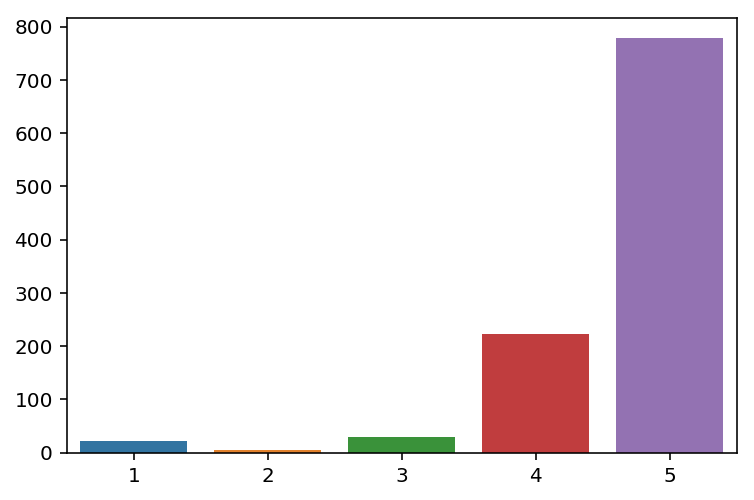

In [17]:
sns.barplot(x=bigdata.Rating.value_counts().index,y=bigdata.Rating.value_counts().values)

5    586
4    188
3     29
1     20
2      4
Name: Rating, dtype: int64


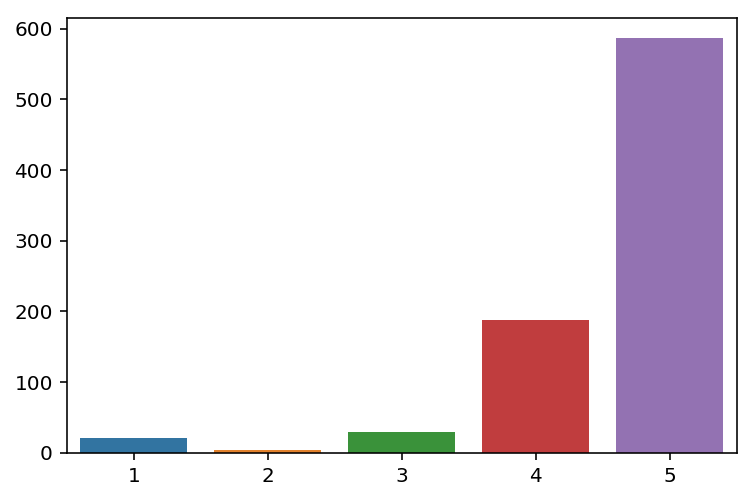

In [18]:
print(pos_neg['Rating'].value_counts())
sns.barplot(x=pos_neg.Rating.value_counts().index,y=pos_neg.Rating.value_counts().values)

In [19]:
pos_neg["r"]=1
pos_neg["r"][pos_neg["Rating"].isin([1,2,3])]= 0

pos_neg.head()

,Comment,Rating,r
0,From last 5 years my younger brother was using...,5,1
1,excellent phone camera is very nice and the st...,4,1
2,I have been using the earlier versions of iPho...,4,1
3,IMPORTANT NOTICEIf you buy some apple device o...,5,1
4,"Well, what can I say... iPhone is awesome as e...",5,1


In [20]:
pos_neg.tail()

,Comment,Rating,r
822,it is good for 1A output not for 2.1 A. Quali...,3,0
823,"Satisfied with the purchase.However, I feel li...",3,0
824,Works good for a month or so and then one day ...,1,0
825,Don't buy this if you have Asus Zenfone... Its...,1,0
826,Pros - 1. Good looking2. Display fabulous3. Wa...,3,0


In [21]:
pos_neg['r'].value_counts()

1    774
0     53
Name: r, dtype: int64

In [34]:
pos_neg.to_csv('scraping.csv')

# Train Test and Split

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import KFold,StratifiedKFold


sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

X_train_data,x_test_data,Y_train_data,y_test_data=train_test_split(pos_neg["Comment"],pos_neg["r"],test_size=0.2)


In [30]:
print(Y_train_data.value_counts())
Y_train_data.tail()


1    619
0     42
Name: r, dtype: int64


728    1
735    1
454    0
211    1
418    1
Name: r, dtype: int64

In [31]:
X_train_data.head()


387    I have edited my review post receiving an upda...
105    First to Flipkart delivery service - Thanks a ...
401    Awsome product loved the blue color amazing fe...
337    The phone is really good 👍....BATTERY: The pho...
552    Honor 9i product with quality wise & in this f...
Name: Comment, dtype: object

# Text Transformation

In [32]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf_vector = TfidfVectorizer(stop_words="english")
tfidf_vector.fit(X_train_data)
X_train_data_new=tfidf_vector.transform(X_train_data)
print(X_train_data_new.shape)
x_test_data_new=tfidf_vector.transform(x_test_data)


(661, 2103)


# Model
# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

predictions = dict()


lr_model = LogisticRegression()
lr_model.fit(X_train_data_new,Y_train_data)
predictions["LogisticRegression"] = lr_model.predict(x_test_data_new)
print("Accuracy_Score :- ",accuracy_score(y_test_data,predictions["LogisticRegression"]))
print(confusion_matrix(y_test_data, predictions['LogisticRegression']))


Accuracy_Score :-  0.9337349397590361
[[  0  11]
 [  0 155]]


In [ ]:
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

log_reg_sm = LogisticRegression()

log_reg_params = {"panalty":['l2'],'C':[0.001,0.01,0.1,1,10,100,1000], 'solver':['liblinear'] }
rand_log_reg = RandomizedSearchCV(LogisticRegression(),log_reg_params,n_iter=4)

for train